# "backtesting crypto"
> "How to fetch and backtest crypto data using fastquant"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Jerome de Leon
- categories: [crypto, backtest, grid search]

In [1]:
# uncomment to install in colab
# !pip3 install fastquant

## fetch data from binance

In [2]:
from fastquant import get_crypto_data

crypto = get_crypto_data("BTC/USDT", 
                         "2018-12-01", 
                         "2019-12-31",
                         time_resolution='1d'
                        )

In [3]:
crypto.tail()

,open,high,low,close,volume
dt,,,,,
2019-12-27,7202.00,7275.86,7076.42,7254.74,33642.701861
2019-12-28,7254.77,7365.01,7238.67,7316.14,26848.982199
2019-12-29,7315.36,7528.45,7288.00,7388.24,31387.106085
2019-12-30,7388.43,7408.24,7220.00,7246.00,29605.911782
2019-12-31,7246.00,7320.00,7145.01,7195.23,25954.453533


## run backtest with a grid of values

In [ ]:
from fastquant import backtest

results = backtest('smac', 
                   crypto, 
                   fast_period=[7,14,21,28], 
                   slow_period=[30,45,60,75],
                   plot=False,
                   verbose=False
                  )

In [6]:
results.head()

,init_cash,buy_prop,sell_prop,commission,execution_type,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,sharperatio,pnl,final_value
0,100000,1,1,0.0075,close,7,75,0.949014,0.002397,0.829272,82.927229,0.987367,158316.23,258316.234050
1,100000,1,1,0.0075,close,28,60,0.931504,0.002352,0.809002,80.900205,0.986999,153832.42,253832.420400
2,100000,1,1,0.0075,close,14,75,0.830975,0.002098,0.696898,69.689847,0.984563,129555.54,229555.539175
3,100000,1,1,0.0075,close,21,75,0.782243,0.001975,0.645083,64.508323,0.983142,118637.07,218637.072700
4,100000,1,1,0.0075,close,28,75,0.769574,0.001943,0.631874,63.187426,0.982741,115884.74,215884.739100


That's a 258% maximum profit using only SMAC because bitcoin was bullish all time long!

In [7]:
#get best parameters on top row 
fast_best, slow_best = results.iloc[0][["fast_period","slow_period"]]
fast_best, slow_best

(7, 75)

## run backtest using optimum values

In [8]:
import matplotlib as pl
pl.style.use("default")
pl.rcParams["figure.figsize"] = (9,5)

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 75
Final Portfolio Value: 258316.23405000006
Final PnL: 158316.23
Time used (seconds): 0.1027975082397461
Optimal parameters: {'init_cash': 100000, 'buy_prop': 1, 'sell_prop': 1, 'commission': 0.0075, 'execution_type': 'close', 'fast_period': 7, 'slow_period': 75}
Optimal metrics: {'rtot': 0.9490143617322465, 'ravg': 0.002396500913465269, 'rnorm': 0.8292722866407841, 'rnorm100': 82.92722866407841, 'sharperatio': 0.9873670567519415, 'pnl': 158316.23, 'final_value': 258316.23405000006}


<IPython.core.display.Javascript object>


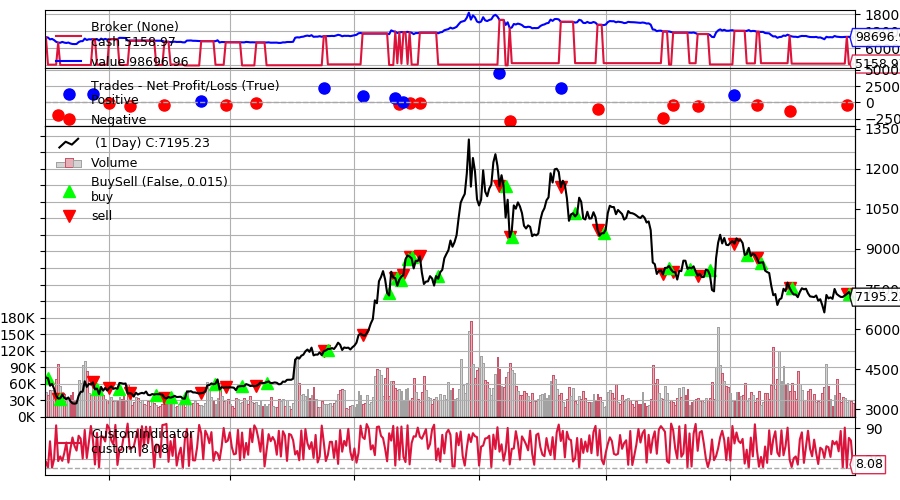

In [9]:
results = backtest('smac', 
                   crypto, 
                   fast_period=fast_best, 
                   slow_period=slow_best,
                   plot=True,
                   verbose=False
                  )

## accessing transactions history

This is done by setting `return_transactions`=True

### single strategy

In [10]:
results, transactions = backtest('smac', 
                               crypto, 
                               fast_period=fast_best, 
                               slow_period=slow_best,
                               plot=False,
                               verbose=False,
                               return_transactions=True
                              )

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 75
2019-02-14, BUY CREATE, 3590.56
2019-02-14, Cash: 100000.0
2019-02-14, Price: 3590.56
2019-02-14, Buy prop size: 27
2019-02-14, Afforded size: 27
2019-02-14, Final size: 27
2019-02-15, BUY EXECUTED, Price: 3590.56, Cost: 96945.12, Comm: 727.09
2019-08-20, SELL CREATE, 10142.57
2019-08-21, SELL EXECUTED, Price: 10142.57, Cost: 96945.12, Comm: 2053.87
2019-08-21, OPERATION PROFIT, GROSS: 176904.27, NET: 174123.31
2019-11-01, BUY CREATE, 9231.61
2019-11-01, Cash: 274123.31117500004
2019-11-01, Price: 9231.61
2019-11-01, Buy prop size: 29
2019-11-01, Afforded size: 29
2019-11-01, Final size: 29
2019-11-02, BUY EXECUTED, Price: 9231.61, Cost: 267716.69, Comm: 2007.88
2019-11-11, SELL CREATE, 8821.94
2019-11-12, SELL EXECUTED, Price: 8821.94, Cost: 267716.69, Comm: 1918.77
2019-11-12, OPERATION PROFIT, GROSS: -11880.43, NET: -15807.08


In [11]:
transactions.keys()

dict_keys(['fast_period7_slow_period75'])

In [12]:
transactions

{'fast_period7_slow_period75':             buy_price  sell_price       cost  commision  net_profit
 dt                                                                 
 2019-02-15    3590.56         NaN   96945.12     727.09         NaN
 2019-08-21        NaN    10142.57   96945.12    2053.87   174123.31
 2019-11-02    9231.61         NaN  267716.69    2007.88         NaN
 2019-11-12        NaN     8821.94  267716.69    1918.77   -15807.08}

In [13]:
r = results.squeeze()
r.final_value

258316.23405000006

In [14]:
r.init_cash + transactions['fast_period7_slow_period75'].net_profit.sum()

258316.23

## single strategy with grid search

In [ ]:
results, transactions = backtest('smac', 
                               crypto, 
                               fast_period=[7,14,21], 
                               slow_period=[30,45,60],
                               plot=False,
                               verbose=False,
                               return_transactions=True
                              )

In [16]:
transactions.keys()

dict_keys(['fast_period7_slow_period30', 'fast_period7_slow_period45', 'fast_period7_slow_period60', 'fast_period14_slow_period30', 'fast_period14_slow_period45', 'fast_period14_slow_period60', 'fast_period21_slow_period30', 'fast_period21_slow_period45', 'fast_period21_slow_period60'])

### multi strategy

In [ ]:
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': [7,14,21], 
           'slow_period': [30,45,60]
            },
        'rsi': {
            'rsi_upper': [70,80],
            'rsi_lower': [20,30] 
        }
   }
results, transactions = backtest('multi', 
                                   crypto, 
                                   strats=strats,
                                   plot=False,
                                   verbose=False,
                                   return_transactions=True
                                  )

In [18]:
transactions.keys()

dict_keys(['smac.fast_period7_slow_period30', 'rsi.rsi_upper70_rsi_lower20', 'rsi.rsi_upper70_rsi_lower30', 'rsi.rsi_upper80_rsi_lower20', 'rsi.rsi_upper80_rsi_lower30', 'smac.fast_period7_slow_period45', 'smac.fast_period7_slow_period60', 'smac.fast_period14_slow_period30', 'smac.fast_period14_slow_period45', 'smac.fast_period14_slow_period60', 'smac.fast_period21_slow_period30', 'smac.fast_period21_slow_period45', 'smac.fast_period21_slow_period60'])

## custom strat

In [4]:
import numpy as np
crypto["custom"] = np.random.random((crypto.shape[0],)) * 100

In [ ]:
results, transactions = backtest('custom', 
                                crypto, 
                                upper_limit=90, 
                                lower_limit=20,
                                plot=True,
                                verbose=True,
                                return_transactions=True
                                )

In [20]:
transactions

{'upper_limit90_lower_limit20':             buy_price  sell_price       cost  commision  net_profit
 dt                                                                 
 2018-12-02    4190.02         NaN   96370.46     722.78         NaN
 2018-12-07        NaN     3403.55   96370.46     587.11   -19398.70
 2018-12-08    3403.55         NaN   78281.65     587.11         NaN
 2018-12-24        NaN     4008.01   78281.65     691.38    12624.09
 2018-12-26    3745.79         NaN   89898.96     674.24         NaN
 2019-01-01        NaN     3797.14   89898.96     683.49     -125.33
 2019-01-06    3770.96         NaN   90503.04     678.77         NaN
 2019-01-11        NaN     3601.31   90503.04     648.24    -5398.61
 2019-01-24    3552.82         NaN   85267.68     639.51         NaN
 2019-01-28        NaN     3434.15   85267.68     618.15    -4105.73
 2019-01-31    3458.18         NaN   79538.14     596.54         NaN
 2019-02-07    3405.37         NaN    3405.37      25.54         NaN
 20

In [24]:
r = results.squeeze()
r.final_value

98696.95989999996

In [25]:
r.init_cash + transactions['upper_limit90_lower_limit20'].net_profit.sum()

100982.11